# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error, r2_score

# Importing Dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# Basic EDA

In [3]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# PLOT BASED EDA

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

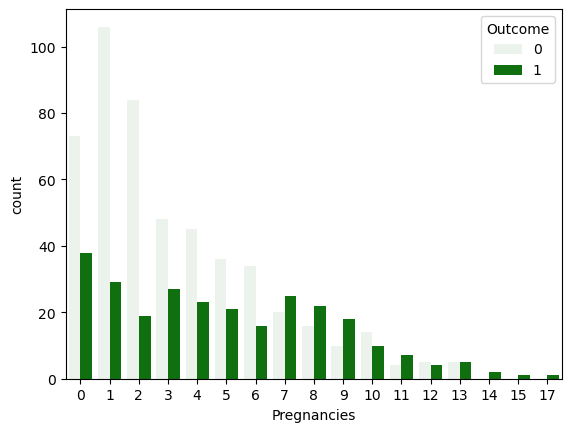

In [8]:
sns.countplot(x='Pregnancies', data=dataset,hue = 'Outcome',color='green')

> From the above plot i feel after certain number of pregnancies one gets more prone to diabetes if compared to someone to less pragnancies count.

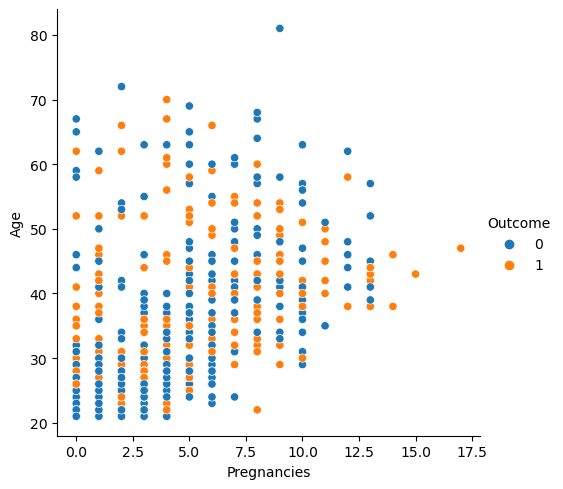

In [9]:
sns.relplot(data=dataset, x="Pregnancies", y="Age",hue='Outcome')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  """


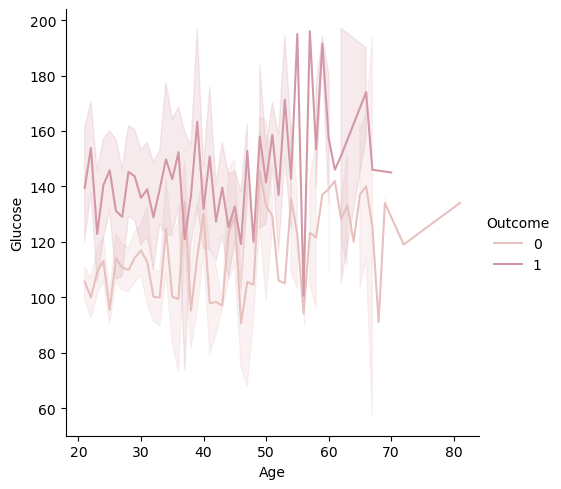

In [10]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dataset, kind="line",
    x="Age", y="Glucose",
    hue="Outcome", palette=palette,
)

> Based on the plot above, we can deduce that glucose levels normally range between 100 and 160 for younger persons (20-35), after which they begin to fluctuate.

> We may also draw the obvious conclusion that people with higher glucose levels are more likely to be diabetic.

# Feature Engineering

In [11]:
y = dataset.Outcome
X = dataset.drop('Outcome',axis = 1)

**Cleaning Dataset**

<AxesSubplot:>

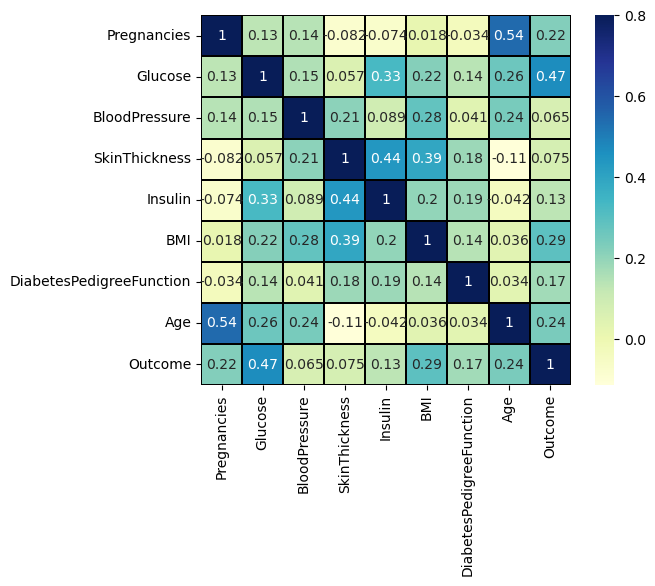

In [12]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix,vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Load your dataset into X and y

# Create the RFE object and specify the model and number of features to select
model = LinearRegression()
rfe = RFE(model, n_features_to_select=6)

# Fit the RFE object to the dataset
rfe.fit(X, y)

# Get the ranking of the features
ranking = rfe.ranking_

# Get the selected features
selected_features = X.columns[rfe.support_]


In [14]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
selected_features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [16]:
X.drop(columns=['BloodPressure','SkinThickness','Insulin'],axis=1,inplace=True)

**Spliting Dataset into training and testing dataset**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

**Feature Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training ML Model

**XGBOOST**

Accuracy - 0.7337662337662337

In [19]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[79 20]
 [21 34]]


0.7337662337662337

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.84 %
Standard Deviation: 5.91 %


**Logistic Regression**

Accuracy - 0.7337662337662337

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [23]:
y_pred2 = classifier.predict(X_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error, r2_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[79 20]
 [21 34]]


0.7337662337662337

**K-NN**

Accuracy - 0.7857142857142857

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred3 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
print(accuracy_score(y_test, y_pred3))

[[88 11]
 [22 33]]
0.7857142857142857


**SVM**

accuracy - 0.7987012987012987

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred4 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
print(accuracy_score(y_test, y_pred4))

[[91  8]
 [23 32]]
0.7987012987012987


**Random Forest Classifier**

Accuracy - 0.7727272727272727

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred5 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
print(accuracy_score(y_test, y_pred5))

[[84 15]
 [20 35]]
0.7727272727272727


# Results

**SO the best Support Vector Classification gave the best accuracy of ~0.79.**

**This happened for the very first time that SVC gave best results in my Ml journey.😅**


> Thanks for reading.
> Please Upvote and comment if you kind this notebook informative.